## **A simple classification task**

### 데이터셋 로드하기

데이터 파일은 [여기](https://drive.google.com/file/d/1Ik9jfy1pGQG03csXwfupj7ENfSktRkbw/view?usp=share_link)에서 다운로드한다.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/DataScience2023/chap06_machine_learning/datasets/fruit_data_with_colors.txt'

In [ ]:
fruits = pd.read_table(path)

In [ ]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
fruits.tail(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
52,4,lemon,unknown,118,5.9,8.0,0.72
53,4,lemon,unknown,120,6.0,8.4,0.74
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70
59,4,lemon,unknown,132,7.6,NaN,NaN
60,3,orange,NaN,180,7.6,8.2,0.79
61,4,lemon,NaN,116,5.9,8.1,0.73


### 데이터의 사전 검사

데이터셋에 대해서 먼저 검사해보자.

In [ ]:
fruits.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    2
mass             0
width            0
height           1
color_score      1
dtype: int64

In [ ]:
fruits = fruits.dropna()
print(fruits.isna().sum())

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64


In [ ]:
numeric_features = fruits.select_dtypes(include=[np.number])
numeric_features.columns

Index(['fruit_label', 'mass', 'width', 'height', 'color_score'], dtype='object')

In [ ]:
categorical_features = fruits.select_dtypes(include=['object'])
categorical_features.columns

Index(['fruit_name', 'fruit_subtype'], dtype='object')

In [ ]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


<Axes: xlabel='mass', ylabel='Count'>

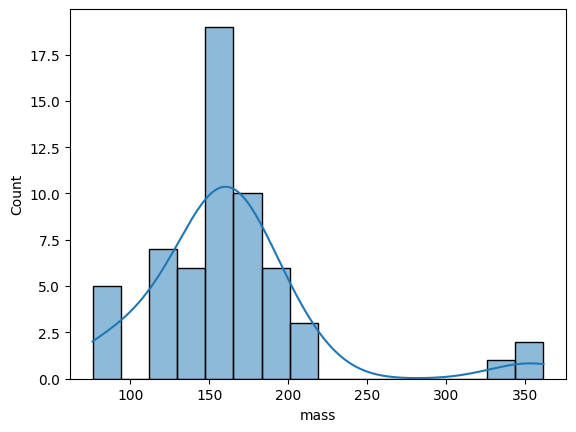

In [ ]:
import seaborn as sns
sns.histplot(fruits['mass'], kde=True)

<Axes: xlabel='width', ylabel='Count'>

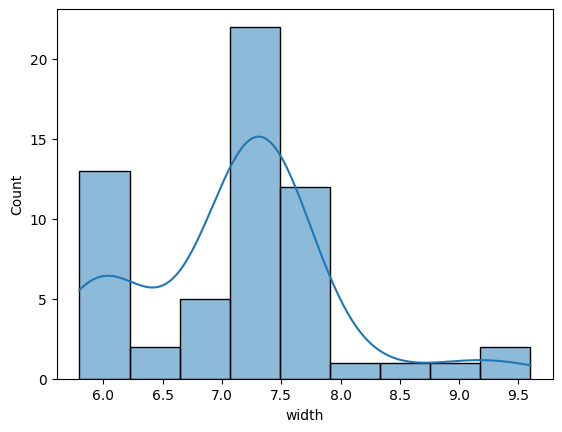

In [ ]:
sns.histplot(fruits['width'], kde=True)

<Axes: xlabel='height', ylabel='Count'>

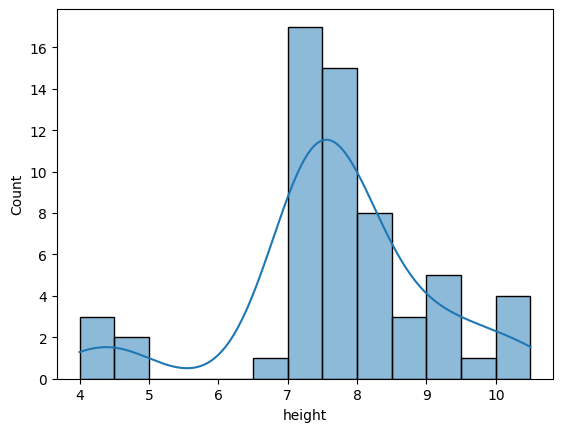

In [ ]:
sns.histplot(fruits['height'], kde=True)

때로는 평균, 최소값, 최대값을 살펴보는 것만으로 예외값(outlier)의 존재를 파악할 수 있다.

DataFrame의 `groupby` 메서드를 이용하여 특정 feature를 기준으로 데이터셋을 분할하여 살펴볼 수 있다. 아래에서는 과일 종류별로 분할하여 살펴보자.

In [ ]:
fruits.groupby(by='fruit_name').describe()

fruit_label                                     mass              \
                 count mean  std  min  25%  50%  75%  max count        mean   
fruit_name                                                                    
apple             19.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  19.0  165.052632   
lemon             16.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  16.0  150.000000   
mandarin           5.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0   5.0   81.200000   
orange            19.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  19.0  193.789474   

            ... height       color_score                                  \
            ...    75%   max       count      mean       std   min   25%   
fruit_name  ...                                                            
apple       ...   7.55   7.9        19.0  0.783684  0.124196  0.55  0.69   
lemon       ...   9.80  10.5        16.0  0.718125  0.010468  0.70  0.71   
mandarin    ...   4.60   4.7         5.0  0.796000  0.016733  0.77  0.79   
orange      ...   8.15   9.4        19.0  0.771053  0.029039  0.72  0.75   

                              
             50%   75%   max  
fruit_name                    
apple       0.84  0.88  0.93  
lemon       0.72  0.72  0.74  
mandarin    0.80  0.81  0.81  
orange      0.77  0.79  0.82  

[4 rows x 40 columns]

In [ ]:
fruits.groupby(by='fruit_name').agg(['count', 'mean', 'min', 'max'])

<ipython-input-18-c54730a37b84>:1: FutureWarning: ['fruit_subtype'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  fruits.groupby(by='fruit_name').agg(['count', 'mean', 'min', 'max'])


fruit_label               mass                       width  \
                 count mean min max count        mean  min  max count   
fruit_name                                                              
apple               19  1.0   1   1    19  165.052632  140  192    19   
lemon               16  4.0   4   4    16  150.000000  116  216    16   
mandarin             5  2.0   2   2     5   81.200000   76   86     5   
orange              19  3.0   3   3    19  193.789474  140  362    19   

                               height                      color_score  \
                mean  min  max  count      mean  min   max       count   
fruit_name                                                               
apple       7.457895  6.9  8.4     19  7.342105  6.8   7.9          19   
lemon       6.512500  5.8  7.3     16  8.856250  7.5  10.5          16   
mandarin    5.940000  5.8  6.2      5  4.380000  4.0   4.7           5   
orange      7.557895  6.7  9.6     19  7.936842  7.0   9.4          19   

                                  
                mean   min   max  
fruit_name                        
apple       0.783684  0.55  0.93  
lemon       0.718125  0.70  0.74  
mandarin    0.796000  0.77  0.81  
orange      0.771053  0.72  0.82

1에서 4까지의 정수로 표현된 `fruit_label`과 과일 이름인 `fruit_name`을 서로 대응하는 쌍들끼리 묶어서 하나의 딕셔너리로 만들어 둔다. 이렇게 `label` 값과 해당 라벨 값의 의미를 딕셔너리로 만들어주면 사용자가 보기 편한 출력을 하는데 유용할 수 있다.

In [ ]:
lookup_fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

**참고**: 일반적으로 `zip` 함수는 2개의 리스트로부터 데이터들을 뽑아서 데이터 쌍(tuple)들의 리스트를 만들때 유용한 함수이다. 참고로 `zip` 함수에 대해서 잠깐 살펴보자.

In [ ]:
# just for test
zipped = zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique())
print(zipped)
list_pair = list(zipped)
print(list_pair)

[(1, 'apple'), (2, 'mandarin'), (3, 'orange'), (4, 'lemon')]


### 트레이닝 데이터와 테스트 데이터로 분할(split)

`sklearn.model_selection.train_test_split` 함수는 데이터를 **랜덤하게 셔플링**한 후 디폴트로는 75% : 25%의 비율로 트레이닝 데이터셋과 테스트 데이터셋으로 분할한다.

In [ ]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape

(44, 4)

In [ ]:
y_train.shape

(44,)

In [ ]:
X_test.shape

(15, 4)

In [ ]:
y_test.shape

(15,)

### 데이터의 사전 검사: **scatter matrix**


데이터셋을 구성하는 feature들 간의 상관관계(correlation)을 살펴보는 것은 때때로 유용하다. 변수들 간의 독립성/종속성을 파악하거나, 어떤 feature가 가장 설명력이 높은지 등에 대해 유용한 정보를 사전에 파악할 수도 있다. 이런 정보가 반드시 도움이 된다는 보장은 없지만 좋은 모델을 수립하는데 유용할 수도 있다.

`pandas`의 `scatter_matrix` 메서드는 feature 쌍들간의 상관관계를 scatter plot으로 그려준다.

<ipython-input-26-715f51966a57>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


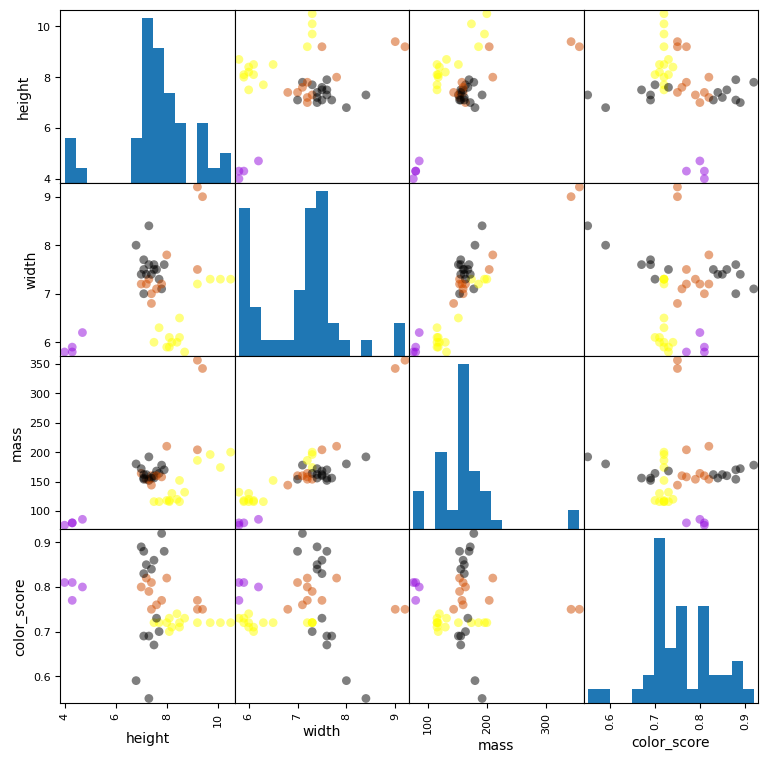

In [ ]:
# plotting a scatter matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

3개의 feature간의 상관관계를 3차원 차트로 그려볼 수도 있다.

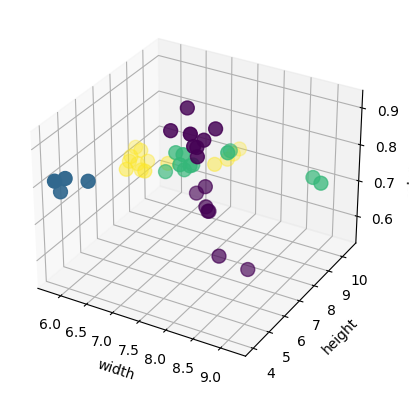

In [ ]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### k-NN classifier 생성하기

`sklearn`은 `KNeighborsClassifier`를 제공한다. `k=5`인 `KNeighborsClassifier`를 다음과 같이 생성한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Training하기

다음과 같이 트레이닝 데이터셋으로 `knn`을 트레이닝한다.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 테스트 데이터에 대해서 정확도 계산하기

`.score` 메서드는 테스트 데이터와 라벨에 대해서 트레이닝된 `KNeighborsClassifier`의 정확도를 계산해준다.

In [ ]:
knn.score(X_test, y_test)

0.5333333333333333

### 트레이닝된 k-NN classifier model을 새로운 데이터에 적용하기

새로운 데이터 인스턴스에 대한 분류 결과는 predict 메서드로 얻을 수 있다.

In [ ]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.60]])    # 입력은 리스트의 리스트이다. 왜?
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [ ]:
fruit_prediction

array([2])

In [ ]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.45]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [ ]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.60], [100, 6.3, 8.5, 0.45]])
fruit_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2, 2])

### `k` 값에 따른 k-NN의 정확도의 변화

k값을 1에서 20까지 변화시키면서 모델의 테스트 정확도를 그려본다.

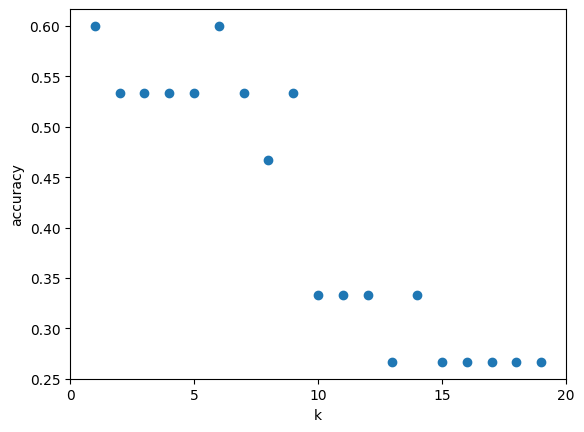

In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

이 예에서는 `k`값이 커질수록 정확도가 낮아졌다. 하지만 이 결과를 성급히 일반화해서는 안된다.

### Feature Normalization

`sklearn`이 제공하는 `MinMaxScaler`를 이용하여 피쳐들을 정규화한다. 동일한 스케일러를 사용하여 테스트 데이터를 정규화한다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
np.max(X_train_scaled, axis=0)

array([1., 1., 1., 1.])

In [ ]:
np.min(X_train_scaled, axis=0)

array([0., 0., 0., 0.])

In [ ]:
np.max(X_test_scaled, axis=0)

array([0.96923077, 1.11764706, 1.02142857, 1.02702703])

In [ ]:
np.min(X_test_scaled, axis=0)

array([0.09230769, 0.05882353, 0.02857143, 0.13513514])

In [ ]:
from scipy import stats
stats.describe(X_train_scaled)

DescribeResult(nobs=44, minmax=(array([0., 0., 0., 0.]), array([1., 1., 1., 1.])), mean=array([0.56048951, 0.36430481, 0.29675325, 0.56695332]), variance=array([0.04444638, 0.06044162, 0.03625879, 0.0406166 ]), skewness=array([-0.76427787,  0.26777946,  1.80868637, -0.19369746]), kurtosis=array([ 1.40826558, -0.07423787,  5.29791269,  0.53191013]))

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [ ]:
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ',
          lookup_fruit_name[knn.predict(example_fruit_scaled)[0]-1])

Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  apple


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
example_fruits = [[20, 4.3, 5.5, 0.60], [100, 6.3, 8.5, 0.45]]
example_fruits_scaled = scaler.transform(example_fruits)
predicttion = knn.predict(example_fruits_scaled)
predicttion

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([4, 4])

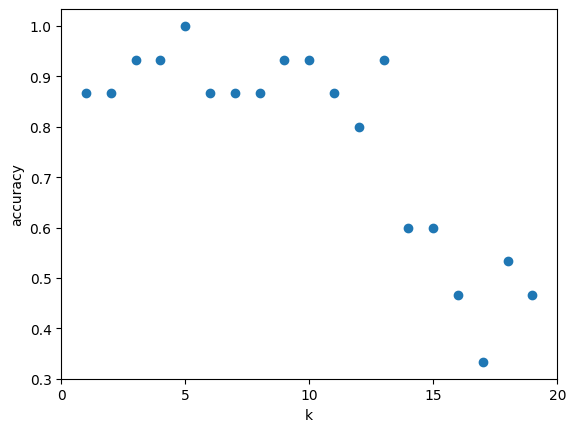

In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### k-NN Regression

이하에서 사용하는 데이터파일은 [여기](https://drive.google.com/file/d/1-9TAs_E3ee3VOVB-xX-k_wg5_rUZZDeW/view?usp=share_link)에서 다운로드한다.

In [ ]:
path_bmd = '/content/drive/MyDrive/DataScience2023/chap06_machine_learning/datasets/bmd.csv'

In [ ]:
bmd_df = pd.read_csv(path_bmd)
bmd_df

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


In [ ]:
features = bmd_df[['age', 'weight_kg', 'height_cm']]
labels = bmd_df['bmd']

In [ ]:
features.describe()

,age,weight_kg,height_cm
count,169.000000,169.000000,169.000000
mean,63.631531,64.665680,160.254438
std,12.356936,11.537171,7.928272
min,35.814058,36.000000,142.000000
25%,54.424211,56.000000,154.000000
50%,63.487837,64.500000,160.500000
75%,72.080558,73.000000,166.000000
max,88.753795,96.000000,177.000000


In [ ]:
labels.describe()

count    169.000000
mean       0.783104
std        0.166529
min        0.407600
25%        0.670800
50%        0.786100
75%        0.888800
max        1.362400
Name: bmd, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[0.81622    0.83102    0.58973999 0.90744003 0.78631999 0.60009999
 0.79604001 0.87662    0.77642    0.61452    0.83961999 0.87626
 0.77882    0.91708001 0.89       0.72753999 0.83283999 1.06532002
 0.74547999 0.73441999 0.8196     0.57126001 0.59096001 0.92137998
 0.89       0.75007998 0.87068    0.84727999 0.73058    0.69234002
 0.70237999 0.83222    0.80476002 0.91178    0.66644    0.79416
 0.99031999 0.74267999 0.99791998 0.7549     0.53776001 0.63676
 0.81609999]
R-squared test score: 0.262


In [ ]:
for K in [1, 3, 7, 15, 55]:
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    print('KNN Regression (K={})\n   Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))


KNN Regression (K=1)
   Train $R^2 = 1.000$,  Test $R^2 = -0.630$
KNN Regression (K=3)
   Train $R^2 = 0.673$,  Test $R^2 = 0.102$
KNN Regression (K=7)
   Train $R^2 = 0.503$,  Test $R^2 = 0.253$
KNN Regression (K=15)
   Train $R^2 = 0.399$,  Test $R^2 = 0.229$
KNN Regression (K=55)
   Train $R^2 = 0.269$,  Test $R^2 = 0.171$
